In [1]:
#Machine learning Models
"""_summary_
Compare models using barplot
Accuracy score algorithm
1. Logistic Regression
2. KNN - K-nearest neighbour
3. SVM - Support Vector Machines
4. Naive Bayes - Gussian Naive Bayes
5. Decision Tree
6.Random Forest
7. Confusion Matrixes
"""

'_summary_\nCompare models using barplot\nAccuracy score algorithm\n1. Logistic Regression\n2. KNN - K-nearest neighbour\n3. SVM - Support Vector Machines\n4. Naive Bayes - Gussian Naive Bayes\n5. Decision Tree\n6.Random Forest\n7. Confusion Matrixes\n'

In [2]:
#import libraries
import numpy as np #linear algebra
import pandas as pd #data processing, csv file(pd.read_csv)
import matplotlib.pyplot as plt # plotting / data visulisation
import seaborn as sns #statistical data visulization
%matplotlib inline

#ML for regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#control display ! this is optional
pd.options.display.max_columns=50
sns.set(style="darkgrid",rc={"axes.facecolor":"#CAF1DE"})

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load /read dataset 
df = pd.read_csv('heart_disease.csv')
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
"""
summary of the columns
cp = chest pain
trestbps = resting blood pressure
chol = cholesterol
fbs = fasting blood sugar
restecg = resting electrocardigaphy
exang = exercise induced agina
oldpeak = ST depression induced
slope = the slope of the peak exercise
ca = number of major vessel
thal = normal, flexied defect, reversible defect
target = have disease or not (1= yes, 0 = no)
"""

'\nsummary of the columns\ncp = chest pain\ntrestbps = resting blood pressure\nchol = cholesterol\nfbs = fasting blood sugar\nrestecg = resting electrocardigaphy\nexang = exercise induced agina\noldpeak = ST depression induced\nslope = the slope of the peak exercise\nca = number of major vessel\nthal = normal, flexied defect, reversible defect\ntarget = have disease or not (1= yes, 0 = no)\n'

In [5]:
#Logistic Regression
# predict one or more possible outcomes (usually represented as 0 or 1)
# column taregets
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [6]:
# get the mean for training data
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


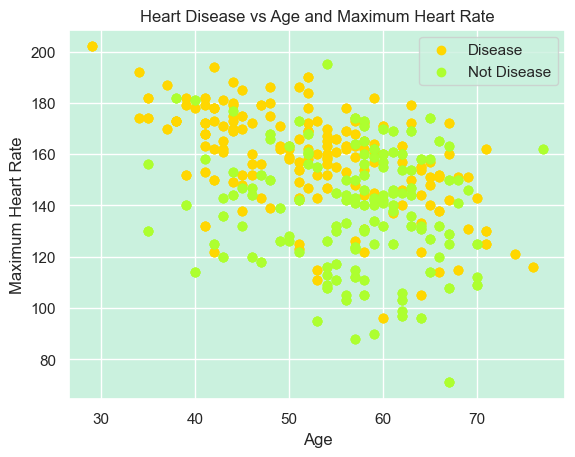

In [7]:
# create a scatterplot for heart diseases vs age and maximum Heary rate
plt.scatter(x=df.age[df.target == 1], y=df.thalach[df.target == 1], c='#FFD700', label = 'Disease')
plt.scatter(x=df.age[df.target == 0], y=df.thalach[df.target == 0], c='#ADFF2F', label = 'Not Disease')

#Add a legend
plt.legend()

#Add label to the axes
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')

#set the title of the plot
plt.title('Heart Disease vs Age and Maximum Heart Rate')

#show the plot
plt.show()

In [8]:
# craete a logistic Regression
#Help to solve problems with classification |
# create the independent variable and dependent variables

y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [9]:
#normalize the data
x = (x_data - np.min(x_data) / np.max(x_data))- np.min(x_data)

In [10]:
#Split the data 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

In [11]:
# transpose matrices
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T

In [12]:
# get the accuracy using the Logidtic Regression
#getting the test Accuracy
accuracies = {}
lr = LogisticRegression()
lr.fit(X_train.T, y_train.T)
acc = lr.score(X_test.T, y_test.T) * 100

accuracies['LogisticRegression'] = acc

#Get output
print('Test Accuracy {:.2f}%'.format(acc))

Test Accuracy 86.34%


In [13]:
# first import the K-Nearest Neighbours (KNN) classifier
# Get accuracy score of the K-Nearest Neighbours algorithm
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 2)
knn.fit(X_train.T, y_train.T)
prediction = knn.predict(X_test.T)

#Get output display
print('{} NN score: {:.2f}%'.format(2, knn.score(X_test.T, y_test.T) *100))

2 NN score: 95.12%


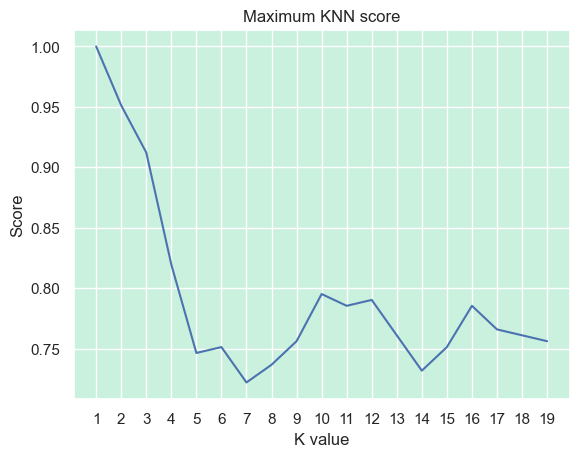

Maximum KNN score is 100.00%


In [14]:
# getting the maximum KNN score for the model
score_list = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors= i)# get the n_neighbors means k
    knn2.fit(X_train.T, y_train.T)
    score_list.append(knn2.score(X_test.T, y_test.T))

#show using the line plot
plt.plot(range(1, 20), score_list)
plt.xticks(np.arange(1,20,1))
plt.xlabel('K value')
plt.ylabel('Score')
plt.title('Maximum KNN score')
plt.show()

#get maximum KNN score for the model in percentage
acc = max(score_list) * 100
accuracies['KNN'] = acc
print('Maximum KNN score is {:.2f}%'.format(acc))

In [15]:
# get test accuracy using the Support Vector Machine (SVM) algorithm
from sklearn.svm import SVC

svm = SVC(random_state= 1)
svm.fit(X_train.T, y_train.T)

acc = svm.score(X_train.T, y_train.T) * 100
accuracies['SVM'] = acc
print('Test Accuracy of SVM Algorithm: {:.2f}%'.format(acc))

Test Accuracy of SVM Algorithm: 70.24%


In [16]:
# Get accuracy the Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train.T, y_train.T)

acc = nb.score(X_test.T, y_test.T) * 100
accuracies['Naive Bayes'] = acc
print('Accuracy of Naive Bayes: {:.2f}%'.format(acc))


Accuracy of Naive Bayes: 85.37%


In [17]:
# get accuracy using decision tree model
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train.T, y_train.T)

acc = dtc.score(X_test.T, y_test.T) * 100
accuracies['Decision Tree'] = acc
print('Decision Tree Accuracy {:.2f}%'.format(acc))

Decision Tree Accuracy 100.00%


In [18]:
# get accuracy of Randim Forest Classification Agorithm
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 1000, random_state= 1)
rf.fit(X_train.T, y_train.T)

acc = rf.score(X_test.T, y_test.T) * 100
accuracies['Random Forest '] = acc

print('Random Forest Algorithm Score: {:.2f}%'.format(acc))

Random Forest Algorithm Score: 100.00%


<Axes: title={'center': 'Compare the models accuracies using the barplot'}, xlabel='ML Model Algorithm', ylabel='Accuracy %'>

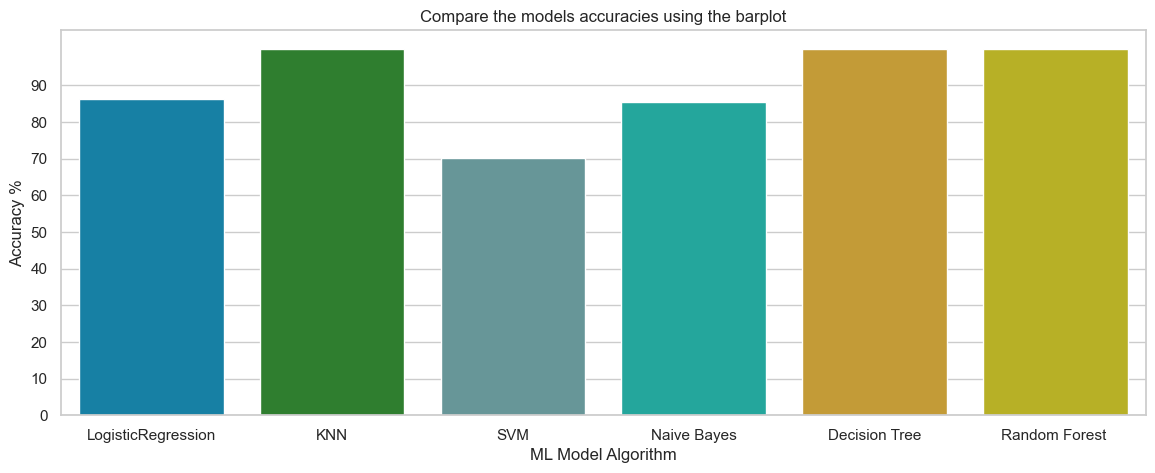

In [19]:
# compare the models accuracies using the barplot from sns
colors = ['#008BBB', '#228B22', '#5F9EA0', '#0FBBAE', '#DAA520', '#CFC60E']

sns.set_style('whitegrid')
plt.figure(figsize=(14,5))
plt.yticks(np.arange(0,100,10))
plt.title('Compare the models accuracies using the barplot')
plt.ylabel('Accuracy %')
plt.xlabel('ML Model Algorithm')
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)

In [20]:
# Get confusion matrices to look at the inbalance dataset
# predict values
y_head_lr = lr.predict(X_test.T)
kn3 = KNeighborsClassifier(n_neighbors= 3)
kn3.fit(X_train.T, y_train.T)
y_head_knn = kn3.predict(X_test.T)
y_head_svm = svm.predict(X_test.T)
y_head_nb = nb.predict(X_test.T)
y_head_dtc = dtc.predict(X_test.T)
y_head_rf = rf.predict(X_test.T)

In [21]:
# import module for confusion matrix
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_dtc = confusion_matrix(y_test, y_head_dtc)
cm_rf = confusion_matrix(y_test, y_head_rf)

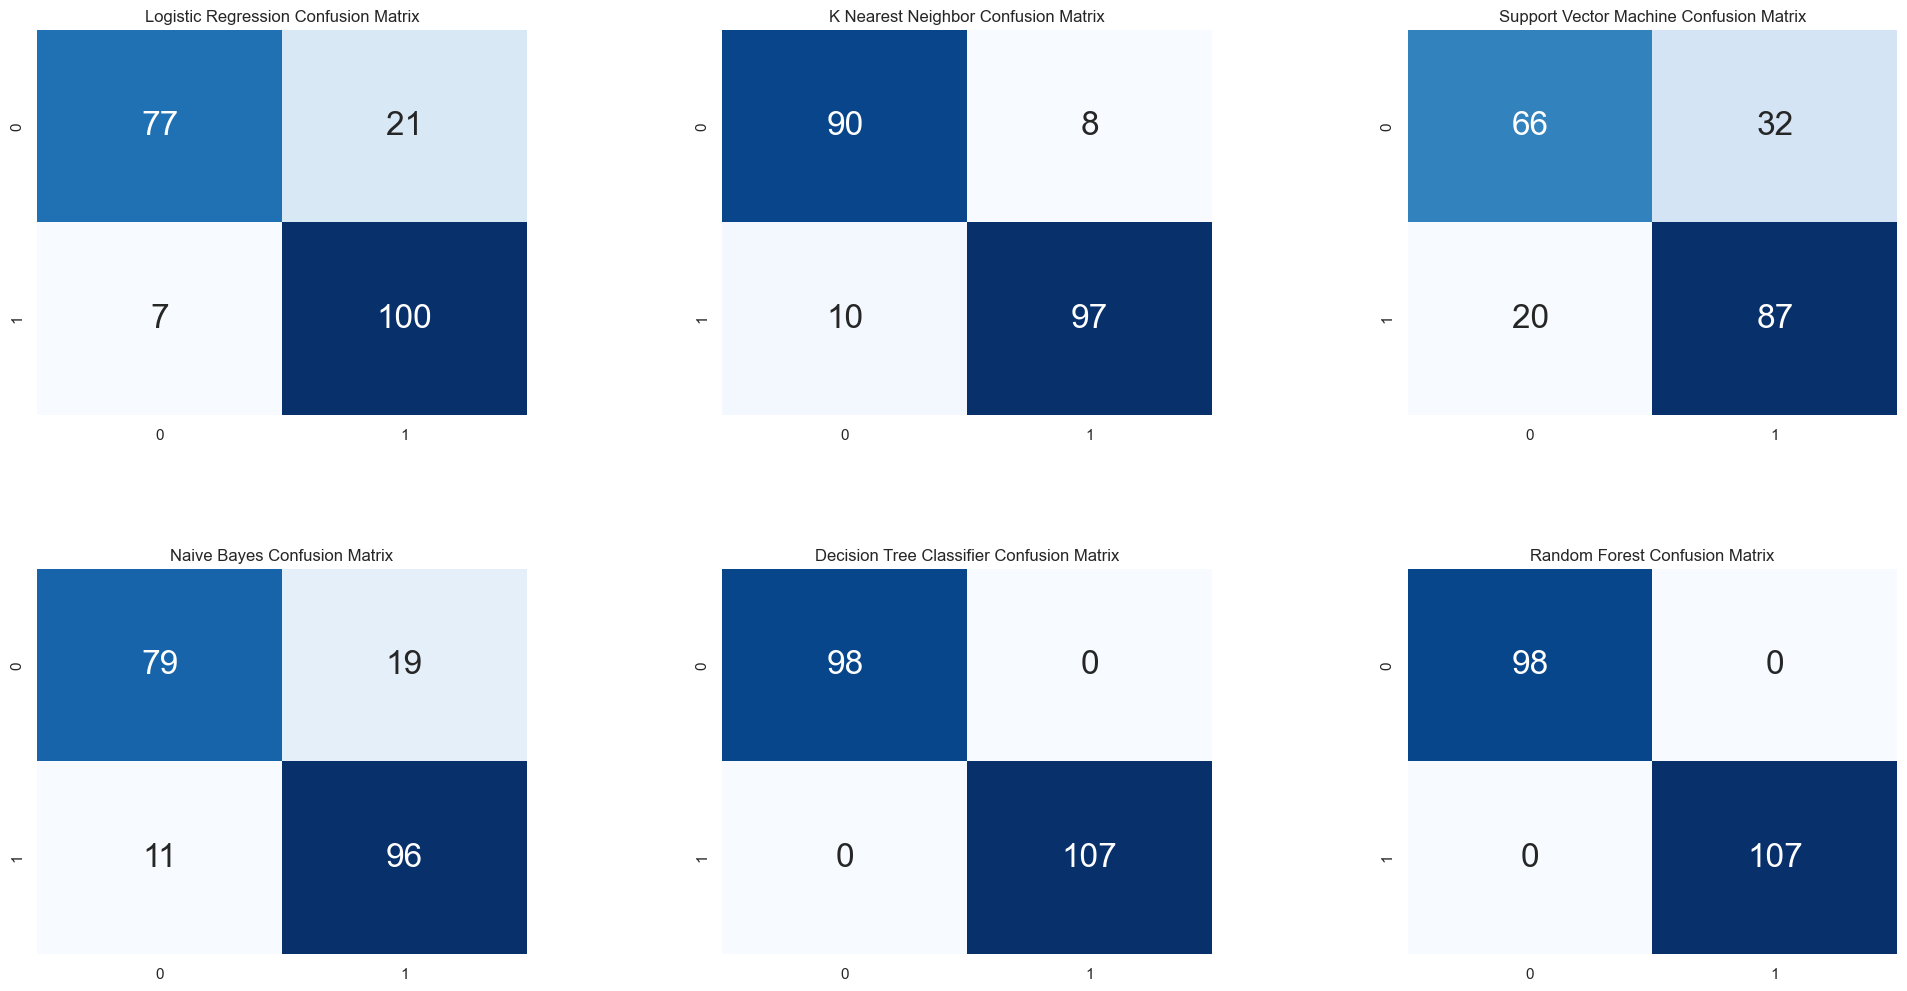

In [22]:
# plotting for heatmap using confusion matrix
plt.figure(figsize=(24,12))

plt.title('Confusion Matrix', fontsize = 24)
plt.subplots_adjust(wspace= 0.4, hspace= 0.4)

# Confusion Regression matrix using heatmap
plt.subplot(2,3,1)
plt.title('Logistic Regression Confusion Matrix')
sns.heatmap(cm_lr, annot = True, cmap = 'Blues', fmt = 'd', cbar = False, annot_kws ={'size':24})

#heatmap for k nearest neighbor confusion matrix
plt.subplot(2,3,2)
plt.title('K Nearest Neighbor Confusion Matrix')
sns.heatmap(cm_knn, annot = True, cmap = 'Blues', fmt = 'd', cbar = False, annot_kws ={'size':24})


#heatmap for Support Vector Machine confusion matrix
plt.subplot(2,3,3)
plt.title('Support Vector Machine Confusion Matrix')
sns.heatmap(cm_svm, annot = True, cmap = 'Blues', fmt = 'd', cbar = False, annot_kws ={'size':24})

#heatmap for Naive Bayes confusion matrix
plt.subplot(2,3,4)
plt.title('Naive Bayes Confusion Matrix')
sns.heatmap(cm_nb, annot = True, cmap = 'Blues', fmt = 'd', cbar = False, annot_kws ={'size':24})

#heatmap for Decision Tree Classifier Confusion  matrix
plt.subplot(2,3,5)
plt.title('Decision Tree Classifier Confusion Matrix')
sns.heatmap(cm_dtc, annot = True, cmap = 'Blues', fmt = 'd', cbar = False, annot_kws ={'size':24})

#heatmap for Random Forest confusion matrix
plt.subplot(2,3,6)
plt.title('Random Forest Confusion Matrix')
sns.heatmap(cm_rf, annot = True, cmap = 'Blues', fmt = 'd', cbar = False, annot_kws ={'size':24})
plt.show()